<a href="https://colab.research.google.com/github/KOISSYK/NLP-Natural-Language-Processing-/blob/main/NLP_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  정제(Cleaning) and 정규화(Normalization)

* 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
* 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다



## 1.1불필요한 단어의 제거

1. 등장 빈도가 적은 단어 
2. 길이가 짧은 단어

In [89]:
import re

In [90]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [91]:
text = 'I was wondering if anyone there could enlighten me on this car'


In [92]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone there could enlighten this car


## 1.2 정규화

In [93]:
#re.compile #compile 컴푸터 안에 이렇게 한다 명령을 내림 (실행하는과정) #ab뒤에 점을찍은 이유- 매치뒤에 뭔가가 올떄

In [94]:
r = re.compile('ab.')

In [95]:
r.search('kkkkkkkkkabc') 
#패턴과 일치하는 첫번째 문자열을 반환한다.

<re.Match object; span=(9, 12), match='abc'>

In [96]:
r.match('kabc')
#시작부분부터 일치하는 패턴을 찾는다.
#match의 첫번째 인자는 패턴, 두번째 인자는 문자열 소스
#match()는 소스와 패턴의 일치여부를 확인하고 일치하면 일치하는 문자열을 반환한다.(match object)
#일치하는 문자열이 없으면 None을 반환한다.

In [97]:
#길이가 1/2인 문자 삭제 
shortword = re.compile(r'\W*\b\w{1,2}\b') # \W*\b\w{1,2}\b 

In [98]:
print(shortword.sub("",text)) #문자열의 replace()와 비슷하지만 패턴을 사용할 수 있다.

 was wondering anyone there could enlighten this car


# 2.어간 추출(Stemming) and 표제어 추출(Lemmatization)


## 2.1 Lemmeatization(표제어 추출)

표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미를 갖습니다. 표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있습니다. 이때, 이 단어들의 표제어는 be라고 합니다.

표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것입니다. 형태소란 '의미를 가진 가장 작은 단위'를 뜻합니다. 그리고 형태학(morphology)이란 형태소로부터 단어들을 만들어가는 학문을 뜻합니다. 형태소의 종류로 어간(stem)과 접사(affix)가 존재합니다.

In [99]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [100]:
words = ['have','going','love','lives','dies','watched','has']
print('표제어 추출 전 : ' ,words )
print('표제어 추출 후 :', [lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 :  ['have', 'going', 'love', 'lives', 'dies', 'watched', 'has']
표제어 추출 후 : ['have', 'going', 'love', 'life', 'dy', 'watched', 'ha']


In [101]:
lemmatizer.lemmatize('dies','v')

'die'

In [102]:
lemmatizer.lemmatize('has','v')

'have'

## 2.2 porter algorithm(어간 추출)

어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다. 예제를 보면 쉽게 이해할 수 있습니다. 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)에 아래의 문자열을 입력으로 넣는다고 해봅시다.

In [103]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [105]:
stemmer = PorterStemmer()
p_stemmer = PorterStemmer()
l_stemmer = LancasterStemmer()

In [106]:
sentence = "This was not the map we found in Bill Bones's chest, but an accurate copy, complete in all thinsg--names and heights and soundings--with the single exception of the red crosses and the written notes"

In [107]:
stemmer = LancasterStemmer()
tokenized_sentence = word_tokenize(sentence)

In [108]:
word_tokenize(sentence)

['This',
 'was',
 'not',
 'the',
 'map',
 'we',
 'found',
 'in',
 'Bill',
 'Bones',
 "'s",
 'chest',
 ',',
 'but',
 'an',
 'accurate',
 'copy',
 ',',
 'complete',
 'in',
 'all',
 'thinsg',
 '--',
 'names',
 'and',
 'heights',
 'and',
 'soundings',
 '--',
 'with',
 'the',
 'single',
 'exception',
 'of',
 'the',
 'red',
 'crosses',
 'and',
 'the',
 'written',
 'notes']

In [109]:
print(tokenized_sentence)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Bill', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'thinsg', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes']


In [110]:
print([stemmer.stem(word) for word in tokenized_sentence])

['thi', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'bil', 'bon', "'s", 'chest', ',', 'but', 'an', 'acc', 'cop', ',', 'complet', 'in', 'al', 'thinsg', '--', 'nam', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'exceiv', 'of', 'the', 'red', 'cross', 'and', 'the', 'writ', 'not']


In [111]:
print('포터 스테머의 어간 추출 후:',[p_stemmer.stem(w) for w in tokenized_sentence])
print('랭커스터 스테머의 어간 추출 후:',[l_stemmer.stem(w) for w in tokenized_sentence])

포터 스테머의 어간 추출 후: ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'bill', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thinsg', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note']
랭커스터 스테머의 어간 추출 후: ['thi', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'bil', 'bon', "'s", 'chest', ',', 'but', 'an', 'acc', 'cop', ',', 'complet', 'in', 'al', 'thinsg', '--', 'nam', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'exceiv', 'of', 'the', 'red', 'cross', 'and', 'the', 'writ', 'not']


Stemming
am → am
the going → the go
having → hav

Lemmatizations
the going → the going
having → have

In [112]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2.3 불용어 제거하기

In [113]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
# text에서 숫자만 추출하려면?
re.findall("\d+", text)
re.findall("\d+", "자연어처리")

text

text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is,\
 in theoretical computer science and formal language theory, a sequence of characters that define a search pattern." # 아무 영어 문장 사용 
p_text = re.sub('[^a-zA-Z]', ' ' , text)
print(p_text)

text = "a[0] [] 0 1 2 3 abcdef .!@#$%^&*()"
re.sub('[^a-zA-Z0-9]', ' ' , text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


'a 0     0 1 2 3 abcdef            '

In [114]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is,\
 in theoretical computer science and formal language theory, a sequence of characters that define a search pattern." # 아무 영어 문장 사용 
p_text = re.sub('[^a-zA-Z]', ' ' , text)   #[^a-zA-Z] =>> 영어 소문자/대문자 빼고 모두 제거
print(p_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [115]:
text='''100 John  PROF
101 James STUD
102 Mac STUD'''

#공백기준 분리
re.split('\s+',text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [116]:
#숫자만 추출 
re.findall('\d+',text)

['100', '101', '102']

In [117]:
#텍스트가 대문자인 행 추출
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [118]:
#처음만 대문자 추출
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

3. 

# 3. 정규 표현식(Regular Expression) - RE





## 3.1 정규 표현식 문법


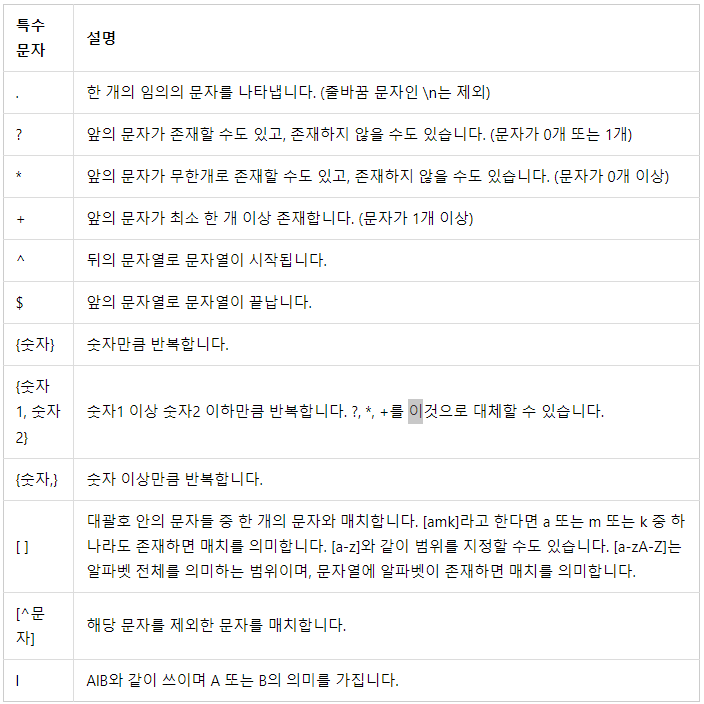

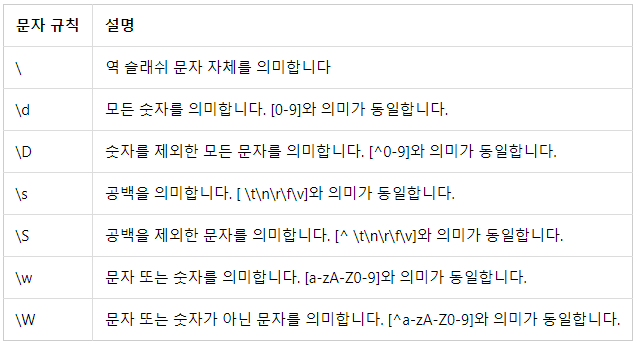

## 3.2 정규표현식 모듈 함수


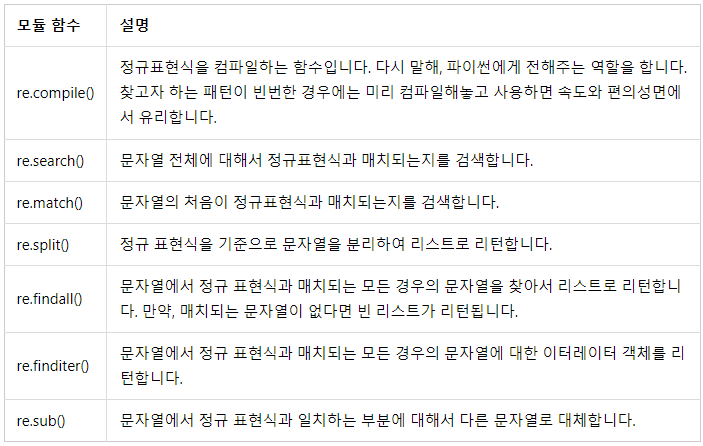

## 3.3 정규 표현식 텍스트 전처리 예제

In [119]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

'\s+'는 공백을 찾아내는 정규표현식입니다. 뒤에 붙는 +는 최소 1개 이상의 패턴을 찾아낸다는 의미입니다. s는 공백을 의미하기 때문에 최소 1개 이상의 공백인 패턴을 찾아냅니다. split은 주어진 정규표현식을 기준으로 분리하므로 결과는 아래와 같습니다.

In [120]:
re.split('\s+', text)  


['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [121]:
re.findall('\d+',text)  


['100', '101', '102']

이번에는 텍스트로부터 대문자인 행의 값만 가져와봅시다. 이 경우 정규 표현식에 대문자를 기준으로 매치시키면 됩니다. 하지만 정규 표현식에 대문자라는 기준만을 넣을 경우에는 문자열을 가져오는 것이 아니라 모든 대문자 각각을 갖고오게 됩니다.

In [122]:
re.findall('[A-Z]',text)


['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

대문자가 연속적으로 네 번 등장하는 경우라는 조건을 추가해봅시다.



In [123]:
re.findall('[A-Z]{4}',text)  


['PROF', 'STUD', 'STUD']

대문자로 구성된 문자열들을 가져옵니다. 이름의 경우에는 대문자와 소문자가 섞여있는 상황입니다. 이름에 대한 행의 값을 갖고오고 싶다면 처음에 대문자가 등장한 후에 소문자가 여러번 등장하는 경우에 매치하게 합니다.

In [124]:
re.findall('[A-Z][a-z]+',text)


['John', 'James', 'Mac']

## 3.4 정규 표현식을 이용한 토큰화

### RegexpTokenizer

NLTK에서는 정규 표현식을 사용해서 단어 토큰화를 수행하는 RegexpTokenizer를 지원합니다. RegexpTokenizer()에서 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화를 수행합니다. 

tokenizer1에 사용한 \w+는 문자 또는 숫자가 1개 이상인 경우를 의미합니다.

tokenizer2에서는 공백을 기준으로 토큰화하도록 했습니다. **gaps=true는 해당 정규 표현식을 토큰으로 나누기 위한 기준**으로 사용한다는 의미입니다. 만약 gaps=True라는 부분을 기재하지 않는다면, 토큰화의 결과는 공백들만 나오게 됩니다. tokenizer2의 결과는 위의 tokenizer1의 결과와는 달리 아포스트로피(')나 온점을 제외하지 않고 토큰화가 수행된 것을 확인할 수 있습니다.

In [125]:
from nltk.tokenize import RegexpTokenizer
text = "Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop"

#특수문자 혹은 공백 기준 단어 및 숫자 분리#
tokenizer1 = RegexpTokenizer("[\w]+")
print(tokenizer1.tokenize(text))
print()
#공백 기준 단어 분리#
tokenizer2 = RegexpTokenizer("\s+",gaps = True) #gap
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']

["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', "Mr.Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [126]:
tokenizer2 = RegexpTokenizer("\s+")
print(tokenizer2.tokenize(text))

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


# 4. 정수 인코딩(Integer Encoding)

### 4.1 dictionary 사용하기


In [127]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [128]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [129]:
#문장토큰화
sentences= sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


기존의 텍스트 데이터가 문장 단위로 토큰화 된 것을 확인할 수 있다. 

word 코튼화에서 불필요한것은 어떻게 할가?라는 생각을 해야됨

In [130]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))
for sentence in sentences:
  #단어토큰화
  tokenized_sentence = word_tokenize(sentence)
  result = []

  for word in tokenized_sentence:
    word = word.lower() #대문자를 소문자화하여 단어의 개수를 줄인다.
    if word not in stop_words:  # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
      if len(word) > 2:   # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
        result.append(word)
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
        preprocessed_sentences.append(result)
    print(preprocessed_sentences)
    print(vocab)
   # print(vocab['barber'])

[]
{}
[['barber']]
{'barber': 1}
[['barber']]
{'barber': 1}
[['barber']]
{'barber': 1}
[['barber', 'person'], ['barber', 'person']]
{'barber': 1, 'person': 1}
[['barber', 'person'], ['barber', 'person']]
{'barber': 1, 'person': 1}
[['barber', 'person'], ['barber', 'person']]
{'barber': 1, 'person': 1}
[['barber', 'person'], ['barber', 'person'], ['barber']]
{'barber': 2, 'person': 1}
[['barber', 'person'], ['barber', 'person'], ['barber']]
{'barber': 2, 'person': 1}
[['barber', 'person'], ['barber', 'person'], ['barber', 'good'], ['barber', 'good']]
{'barber': 2, 'person': 1, 'good': 1}
[['barber', 'person'], ['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person']]
{'barber': 2, 'person': 2, 'good': 1}
[['barber', 'person'], ['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person']]
{'barber': 2, 'person': 2, 'good': 1}
[['barber', 'person'], ['barber', 'person'], ['barber', 'goo

In [131]:
# 현재 vocab에는 각 단어에 대한 빈도수가 기록되어져 있습니다. vocab을 출력
print('단어 집합 :',vocab)

단어 집합 : {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [132]:
# 'barber'라는 단어의 빈도수 출력
print(vocab["barber"])

8


In [133]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)


[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


높은 빈도수를 가진 단어일수록 낮은 정수를 부여합니다. 정수는 1부터 부여합니다.



In [134]:
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


1의 인덱스를 가진 단어가 가장 빈도수가 높은 단어가 됩니다. 그리고 이러한 작업을 수행하는 동시에 각 단어의 빈도수를 알 경우에만 할 수 있는 전처리인 빈도수가 적은 단어를 제외시키는 작업을 수행했습니다. 등장 빈도가 낮은 단어는 자연어 처리에서 의미를 가지지 않을 가능성이 높기 때문입니다. 여기서는 빈도수가 1인 단어들은 전부 제외시켰습니다.

자연어 처리를 하다보면, 텍스트 데이터에 있는 단어를 모두 사용하기 보다는 빈도수가 가장 높은 n개의 단어만 사용하고 싶은 경우가 많습니다. 위 단어들은 빈도수가 높은 순으로 낮은 정수가 부여되어져 있으므로 빈도수 상위 n개의 단어만 사용하고 싶다고하면 vocab에서 정수값이 1부터 n까지인 단어들만 사용하면 됩니다. 여기서는 상위 5개 단어만 사용한다고 가정하겠습니다.

In [135]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


word_to_index에는 빈도수가 높은 상위 5개의 단어만 저장되었습니다. word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 바꾸는 작업을 하겠습니다.


예를 들어 sentences에서 첫번째 문장은 ['barber', 'person']이었는데, 이 문장에 대해서는 [1, 5]로 인코딩합니다. 그런데 두번째 문장인 ['barber', 'good', 'person']에는 더 이상 word_to_index에는 존재하지 않는 단어인 'good'이라는 단어가 있습니다.


이처럼 단어 집합에 존재하지 않는 단어들이 생기는 상황을 Out-Of-Vocabulary(단어 집합에 없는 단어) 문제라고 합니다. 약자로 'OOV 문제'라고도 합니다. word_to_index에 'OOV'란 단어를 새롭게 추가하고, 단어 집합에 없는 단어들은 'OOV'의 인덱스로 인코딩하겠습니다.

In [136]:
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


이제 word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩하겠습니다.



In [137]:
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      encoded_sentence.append(word_to_index[word])
    except KeyError:
      encoded_sentence.append(word_to_index['OOV'])
  encoded_sentences.append(encoded_sentence)
  print(encoded_sentence)
print(encoded_sentences)

[1, 5]
[1, 5]
[1, 6, 5]
[1, 6, 5]
[1, 6, 5]
[1, 3, 5]
[1, 3, 5]
[1, 3, 5]
[6, 2]
[6, 2]
[2, 4, 3, 2]
[2, 4, 3, 2]
[2, 4, 3, 2]
[2, 4, 3, 2]
[3, 2]
[3, 2]
[1, 4, 6]
[1, 4, 6]
[1, 4, 6]
[1, 4, 6]
[1, 4, 6]
[1, 4, 6]
[1, 4, 2]
[1, 4, 2]
[1, 4, 2]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[6, 6, 3, 2, 6, 1, 6]
[1, 6, 3, 6]
[1, 6, 3, 6]
[1, 6, 3, 6]
[1, 6, 3, 6]
[[1, 5], [1, 5], [1, 6, 5], [1, 6, 5], [1, 6, 5], [1, 3, 5], [1, 3, 5], [1, 3, 5], [6, 2], [6, 2], [2, 4, 3, 2], [2, 4, 3, 2], [2, 4, 3, 2], [2, 4, 3, 2], [3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 2], [1, 4, 2], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6], [1, 6, 3, 6], [1, 6, 3, 6], [1, 6, 3, 6]]


 그런데 이보다는 좀 더 쉽게 하기 위해서 Counter, FreqDist, enumerate를 사용하거나, 케라스 토크나이저를 사용하는 것을 권장

## 4.2 Counter 사용하기


In [138]:
from collections import Counter
print('preprocessed_sentences : ',preprocessed_sentences)



preprocessed_sentences :  [['barber', 'person'], ['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['barber', 'huge', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['barber', 'kept', 'secret'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['keeping', 'keeping', 'huge', 'secret', 'd

In [139]:
all_word_list = sum(preprocessed_sentences,[]) # [] 는 넣어야됨 각각의 리스트별로 조건을 맞춰서 합쳐야함
print('sum_preprocessed_sentences :',all_word_list)

sum_preprocessed_sentences : ['barber', 'person', 'barber', 'person', 'barber', 'good', 'person', 'barber', 'good', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'barber', 'huge', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'secret', 'kept', 'huge', 'secret', 'secret', 'kept', 'huge', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'barber', 'kept', 'secret', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'keeping', 'keeping', 'hug

In [140]:
vocab = Counter(all_word_list)
vocab 

Counter({'barber': 28,
         'crazy': 7,
         'driving': 7,
         'good': 3,
         'huge': 20,
         'keeping': 14,
         'kept': 13,
         'knew': 2,
         'mountain': 4,
         'person': 8,
         'secret': 22,
         'went': 4,
         'word': 6})

In [141]:
vocab = Counter(all_word_list)
vocab['barber']

28

In [142]:
#most_common 가장 흔한 
vocab_size = 5  #상위 5개 
vocab = vocab.most_common(vocab_size)
vocab  #결과값은 튜플로된 가장 많이 나온 상위 5개 단어

[('barber', 28), ('secret', 22), ('huge', 20), ('keeping', 14), ('kept', 13)]

In [143]:
#높은 빈도수 순 인덱스 부여
word_to_index={}
i=0
for(word,frequency) in vocab:
  i += 1
  word_to_index[word]=i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'keeping': 4, 'kept': 5}


## 4.3 FreqDist 활용 텍스트 레이블 인코딩

NLTK에서는 빈도수 계산 도구인 FreqDist()를 지원

In [144]:
from nltk import FreqDist
import numpy as np


In [145]:
vocab = FreqDist(np.hstack(preprocessed_sentences))
vocab_size=5
vocab = vocab.most_common(vocab_size)
print(vocab)

[('barber', 28), ('secret', 22), ('huge', 20), ('keeping', 14), ('kept', 13)]


높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여합니다. 그런데 이번에는 enumerate()를 사용하여 좀 더 짧은 코드로 인덱스를 부여하겠습니다.

In [146]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'keeping': 4, 'kept': 5}


## 4.4 enumerate 이해


In [147]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력의 순서대로 0부터 인덱스를 부여함.
  print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다.

## 4.5 텐서플로 활용 텍스트 레이블 인코딩

In [148]:
#사용자가 사용하기 가장 편함
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences) ## fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
print(tokenizer.word_index)
print()
print('빈도수 : ',tokenizer.word_counts)
print()
print(tokenizer.texts_to_sequences(preprocessed_sentences))#인코딩된 결과값

{'barber': 1, 'secret': 2, 'huge': 3, 'keeping': 4, 'kept': 5, 'person': 6, 'driving': 7, 'crazy': 8, 'word': 9, 'went': 10, 'mountain': 11, 'good': 12, 'knew': 13}

빈도수 :  OrderedDict([('barber', 28), ('person', 8), ('good', 3), ('huge', 20), ('knew', 2), ('secret', 22), ('kept', 13), ('word', 6), ('keeping', 14), ('driving', 7), ('crazy', 7), ('went', 4), ('mountain', 4)])

[[1, 6], [1, 6], [1, 12, 6], [1, 12, 6], [1, 12, 6], [1, 3, 6], [1, 3, 6], [1, 3, 6], [13, 2], [13, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [3, 2], [3, 2], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 2], [1, 5, 2], [1, 5, 2], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11]]


In [149]:
#vocab_size=5
tokenizer=Tokenizer(num_words= vocab_size +1) #상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'keeping': 4, 'kept': 5, 'person': 6, 'driving': 7, 'crazy': 8, 'word': 9, 'went': 10, 'mountain': 11, 'good': 12, 'knew': 13}


In [150]:
vocab_size=5
tokenizer=Tokenizer(num_words= vocab_size +2, oov_token = 'OOV') 
tokenizer.fit_on_texts(preprocessed_sentences)
print(tokenizer.word_index['OOV'])

1


# 5.Padding

자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다. 다시 말해 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있다.

## 5.1 Numpy로 패딩하기


In [151]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

단어집합 만들고, 정수 인코딩 수행

In [152]:
#단어 집합을 만들고, 정수 인코딩을 수행합니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded) #모든 단어가 고유한 정수로 변환되었습니다.

[[1, 6], [1, 6], [1, 12, 6], [1, 12, 6], [1, 12, 6], [1, 3, 6], [1, 3, 6], [1, 3, 6], [13, 2], [13, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [3, 2], [3, 2], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 2], [1, 5, 2], [1, 5, 2], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11]]


모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산

In [153]:
#단어의 최대길이///모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산해보겠습니다
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)    

최대 길이 : 7


장 길이가 긴 문장의 길이는 7입니다. 모든 문장의 길이를 7로 맞춰주겠습니다. 이때 가상의 단어 'PAD'를 사용합니다. 'PAD'라는 단어가 있다고 가정하고, 이 단어는 0번 단어라고 정의합니다. 길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞춘다.

In [154]:
#모든 문장의 길이를 max로 맞춥니다. 길이가 7 보다 짧은 문장에는 숫자 0을 채워서 7로 맞춰줍니다.
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  6,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [13,  2,  0,  0,  0,  0,  0],
       [13,  2,  0,  0,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  7,  1,  8],
       [ 4,  4,  3,  2,  7,  1,  8],
 

길이가 7보다 짧은 문장에는 전부 숫자 0이 뒤로 붙어서 모든 문장의 길이가 전부 7이된 것을 알 수 있습니다. 기계는 이들을 하나의 행렬로 보고, 병렬 처리를 할 수 있습니다. 또한, 0번 단어는 사실 아무런 의미도 없는 단어이기 때문에 자연어 처리하는 과정에서 기계는 0번 단어를 무시하게 될 것입니다. 이와 같이 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 합니다. 숫자 0을 사용하고 있다면 ***제로 패딩(zero padding)***

## 5.2 케라스 전처리 도구로 패딩하기

케라스에서는 위와 같은 패딩을 위해 pad_sequences()를 제공

In [155]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoded 값이 위에서 이미 패딩 후의 결과로 저장되었기 때문에 패딩 이전의 값으로 다시 되돌리기

In [156]:
encoded1 = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded1)


[[1, 6], [1, 6], [1, 12, 6], [1, 12, 6], [1, 12, 6], [1, 3, 6], [1, 3, 6], [1, 3, 6], [13, 2], [13, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [2, 5, 3, 2], [3, 2], [3, 2], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 9], [1, 5, 2], [1, 5, 2], [1, 5, 2], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [4, 4, 3, 2, 7, 1, 8], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11], [1, 10, 3, 11]]


케라스의 pad_sequences를 사용하여 패딩

In [157]:
padded = pad_sequences(encoded1)
print(padded)

[[ 0  0  0  0  0  1  6]
 [ 0  0  0  0  0  1  6]
 [ 0  0  0  0  1 12  6]
 [ 0  0  0  0  1 12  6]
 [ 0  0  0  0  1 12  6]
 [ 0  0  0  0  1  3  6]
 [ 0  0  0  0  1  3  6]
 [ 0  0  0  0  1  3  6]
 [ 0  0  0  0  0 13  2]
 [ 0  0  0  0  0 13  2]
 [ 0  0  0  2  5  3  2]
 [ 0  0  0  2  5  3  2]
 [ 0  0  0  2  5  3  2]
 [ 0  0  0  2  5  3  2]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  9]
 [ 0  0  0  0  1  5  2]
 [ 0  0  0  0  1  5  2]
 [ 0  0  0  0  1  5  2]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 4  4  3  2  7  1  8]
 [ 0  0  0  1 10  3 11]
 [ 0  0  0  1 10  3 11]
 [ 0  0  0  1 10  3 11]
 [ 0  0  0  1 10  3 11]]


Numpy로 패딩을 진행하였을 때와는 패딩 결과가 다른데 그 이유는 pad_sequences는 기본적으로 문서의 뒤에 0을 채우는 것이 아니라 앞에 0으로 채우기 때문입니다. 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면됩니다.

In [158]:
padded_b = pad_sequences(encoded1,padding='post')
padded_b

array([[ 1,  6,  0,  0,  0,  0,  0],
       [ 1,  6,  0,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1, 12,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [ 1,  3,  6,  0,  0,  0,  0],
       [13,  2,  0,  0,  0,  0,  0],
       [13,  2,  0,  0,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  9,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 1,  5,  2,  0,  0,  0,  0],
       [ 4,  4,  3,  2,  7,  1,  8],
       [ 4,  4,  3,  2,  7,  1,  8],
 

In [159]:
padded_max = pad_sequences(encoded,padding = 'post', maxlen=5)
padded_max

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3,  2,  7,  1,  8],
       [ 3, 11,  0,  0,  0],
       [ 3, 11,  0,  0,  0],
       [ 3, 11

길이가 5보다 짧은 문서들은 0으로 패딩되고, 기존에 5보다 길었다면 데이터가 손실됩니다. 가령, 뒤에서 두번째 문장은 본래 [ 7, 7, 3, 2, 10, 1, 11]였으나 현재는 [ 3, 2, 10, 1, 11]로 변경된 것을 볼 수 있습니다. 만약, 데이터가 손실될 경우에 앞의 단어가 아니라 뒤의 단어가 삭제되도록 하고싶다면 truncating이라는 인자를 사용합니다. truncating='post'를 사용할 경우 뒤의 단어가 삭제됩니다.

In [160]:
padded_max1 = pad_sequences(encoded,padding = 'post',truncating='post', maxlen=5) #truncating 뒤를잘라내기
padded_max1

array([[ 1,  6,  0,  0,  0],
       [ 1,  6,  0,  0,  0],
       [ 1, 12,  6,  0,  0],
       [ 1, 12,  6,  0,  0],
       [ 1, 12,  6,  0,  0],
       [ 1,  3,  6,  0,  0],
       [ 1,  3,  6,  0,  0],
       [ 1,  3,  6,  0,  0],
       [13,  2,  0,  0,  0],
       [13,  2,  0,  0,  0],
       [ 2,  5,  3,  2,  0],
       [ 2,  5,  3,  2,  0],
       [ 2,  5,  3,  2,  0],
       [ 2,  5,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  9,  0,  0],
       [ 1,  5,  2,  0,  0],
       [ 1,  5,  2,  0,  0],
       [ 1,  5,  2,  0,  0],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 4,  4,  3,  2,  7],
       [ 1, 10,  3, 11,  0],
       [ 1, 10,  3, 11,  0],
       [ 1, 10